In [1]:
from sklearn import datasets

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('../Data/Test2/global-2-2.csv')

In [4]:
df.shape[1] #nr of columns

18

In [5]:
df.shape[0] #nr of entries

24410

In [6]:
df.columns

Index(['MAP_ID', 'MONTH', 'MONTH_SIN', 'MONTH_COS',
       'Median_NrIncidentsLastWeekPast', 'Median_NrIncidentsLastMonthPast',
       'Median_NrCrimesLastWeekPast', 'Median_NrCrimesLastMonthPast',
       'NB_PROPERTIES', 'FLOORS', 'HOUSINGS', 'YEAR_CONSTRUCTION', 'LAND_AREA',
       'BUILDING_AREA', 'USAGE_LOGEMENT', 'CATEGORY_REGULAR',
       'CATEGORY_CONDOMINIUM', 'RISK_ZONE_ID'],
      dtype='object')

In [7]:
X_df = df.drop(['MAP_ID', 'MONTH', 'RISK_ZONE_ID'], axis=1)

In [8]:
X = X_df.values

In [9]:
y = df.loc[:,'RISK_ZONE_ID'].values

In [10]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
#split intro train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

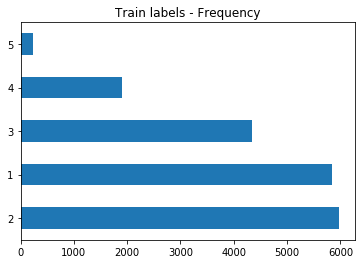

In [12]:
pd.DataFrame(y_train)[0].value_counts().plot(kind='barh', title = 'Train labels - Frequency', label = 'zad', color='C0');

In [13]:
pd.DataFrame(y_test)[0].value_counts()

2    2061
1    1911
3    1450
4     602
5      79
Name: 0, dtype: int64

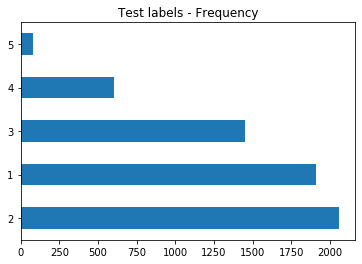

In [14]:
pd.DataFrame(y_test)[0].value_counts().plot(kind='barh', title = 'Test labels - Frequency', color='C0');

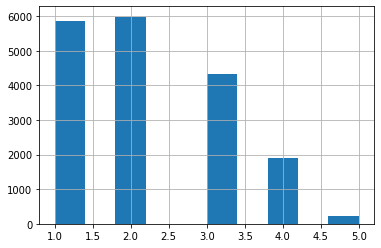

In [15]:
pd.DataFrame(y_train)[0].hist()

In [16]:
# training a Gradient Boosting classifier 
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
clf = GradientBoostingClassifier(n_estimators=420, random_state=0).fit(X_train, y_train) 

In [18]:
y_pred = clf.predict(X_test)

In [19]:
accuracy = clf.score(X_test, y_test)

In [20]:
accuracy

0.5520235949533017

In [21]:
cm = confusion_matrix(y_test, y_pred)

In [22]:
cm

array([[1507,  273,  117,   14,    0],
       [ 759,  901,  359,   42,    0],
       [ 246,  435,  613,  156,    0],
       [  22,   38,  230,  293,   19],
       [   0,    0,    0,   24,   55]])

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df['risk_zone_nb']=df['RISK_ZONE_ID'].factorize()[0]
risk_zone_nb_df = df[['RISK_ZONE_ID','risk_zone_nb']].drop_duplicates().sort_values('risk_zone_nb')

nb_to_riskzone = dict(risk_zone_nb_df[['risk_zone_nb', 'RISK_ZONE_ID']]).values

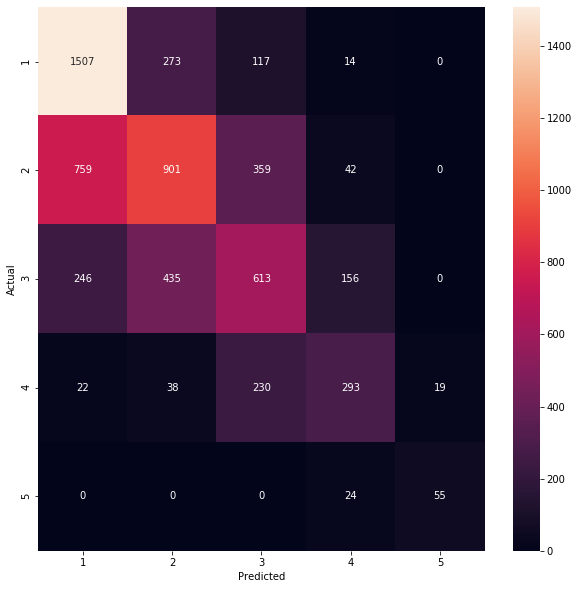

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=risk_zone_nb_df.RISK_ZONE_ID.values, yticklabels=risk_zone_nb_df.RISK_ZONE_ID.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [61]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.79      0.68      1911
           2       0.55      0.44      0.49      2061
           3       0.46      0.42      0.44      1450
           4       0.55      0.49      0.52       602
           5       0.74      0.70      0.72        79

    accuracy                           0.55      6103
   macro avg       0.58      0.57      0.57      6103
weighted avg       0.55      0.55      0.54      6103



### support is the number of actual occurences of the class in the test data set. Imbalanced support in the training data may indicate the need for stratified sampling or rebalancing.
micro-average is preferable if there is a class imbalance problem. The micro-average is used in unbalanced datasets as this method takes the frequency of each class into consideration.
The micro-avg precision, recall and f1-score are mathematically equivalent

In [27]:
print('Cohen-Kappa score: %0.5f' % metrics.cohen_kappa_score(y_test, y_pred))

Cohen-Kappa score: 0.37677


In [28]:
fi = clf.feature_importances_
features = list(X_df.columns)

In [29]:
fi_df = pd.DataFrame(fi, index=features, columns=['f_imp']).sort_values(['f_imp'])

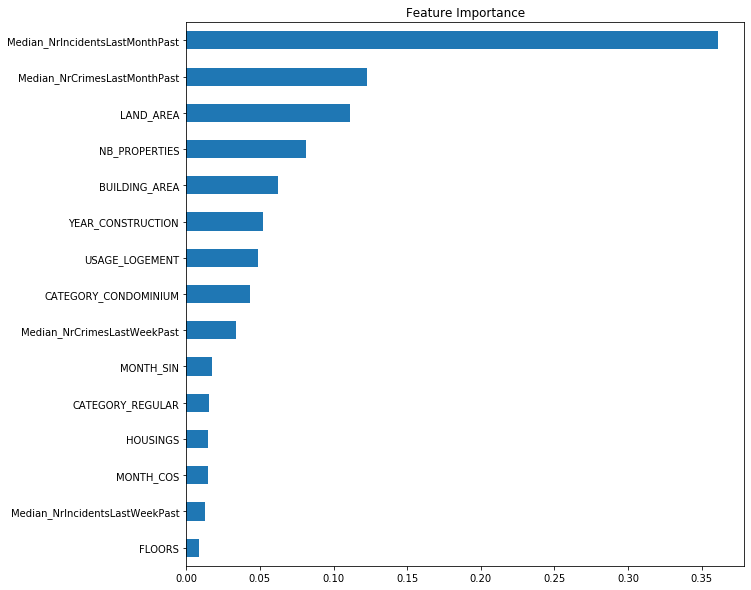

In [30]:
fi_df.plot(kind='barh', title = 'Feature Importance', figsize=(10,10),legend=None);

In [31]:
features

['MONTH_SIN',
 'MONTH_COS',
 'Median_NrIncidentsLastWeekPast',
 'Median_NrIncidentsLastMonthPast',
 'Median_NrCrimesLastWeekPast',
 'Median_NrCrimesLastMonthPast',
 'NB_PROPERTIES',
 'FLOORS',
 'HOUSINGS',
 'YEAR_CONSTRUCTION',
 'LAND_AREA',
 'BUILDING_AREA',
 'USAGE_LOGEMENT',
 'CATEGORY_REGULAR',
 'CATEGORY_CONDOMINIUM']

In [32]:
bad_features = fi_df.query('f_imp<0.001')
bad_features

,f_imp


/Users/dbotnari/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/dbotnari/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


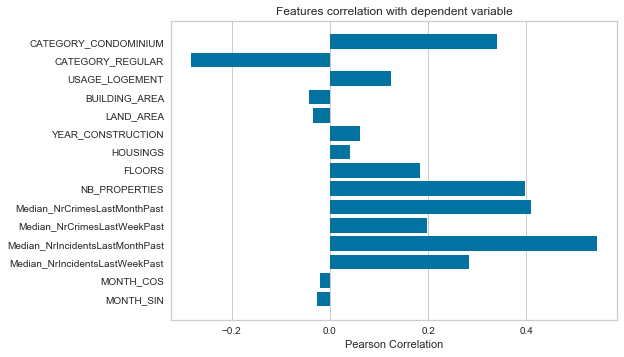

In [33]:
from yellowbrick.target import FeatureCorrelation

fc = FeatureCorrelation(labels=features)
fc.fit(X_train,y_train)
fc.show();

In [34]:
from yellowbrick.style import set_palette
set_palette('colorblind')

/Users/dbotnari/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.5520235949533017

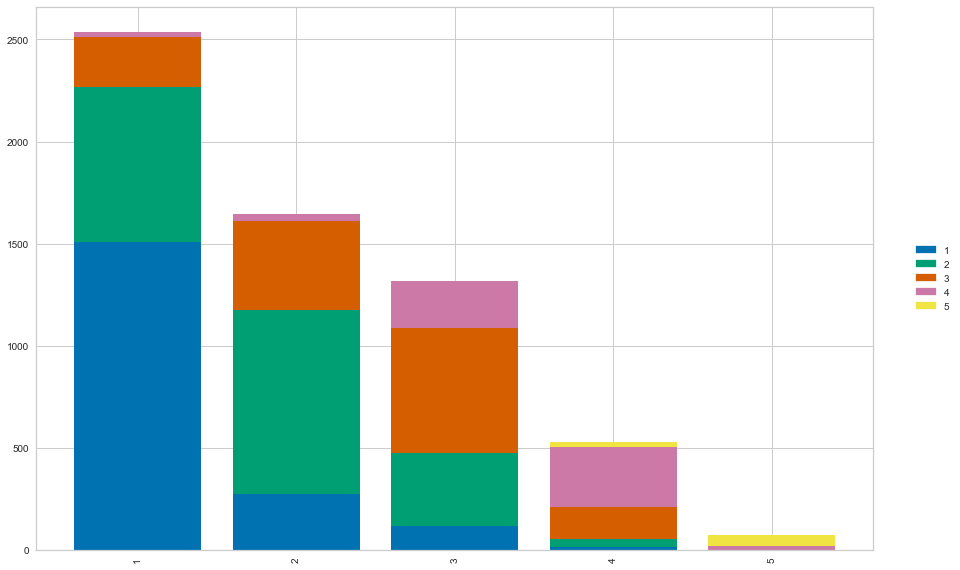

In [35]:
from yellowbrick.classifier import ClassPredictionError
my_title = "Class Prediction Error for Gradient Boosting Classifier"

#classes = ["1", "2", "3", "4", "5"]

cle = ClassPredictionError(clf, size = (1080, 720), title=my_title, show=False)
cle.score(X_test, y_test)

/Users/dbotnari/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


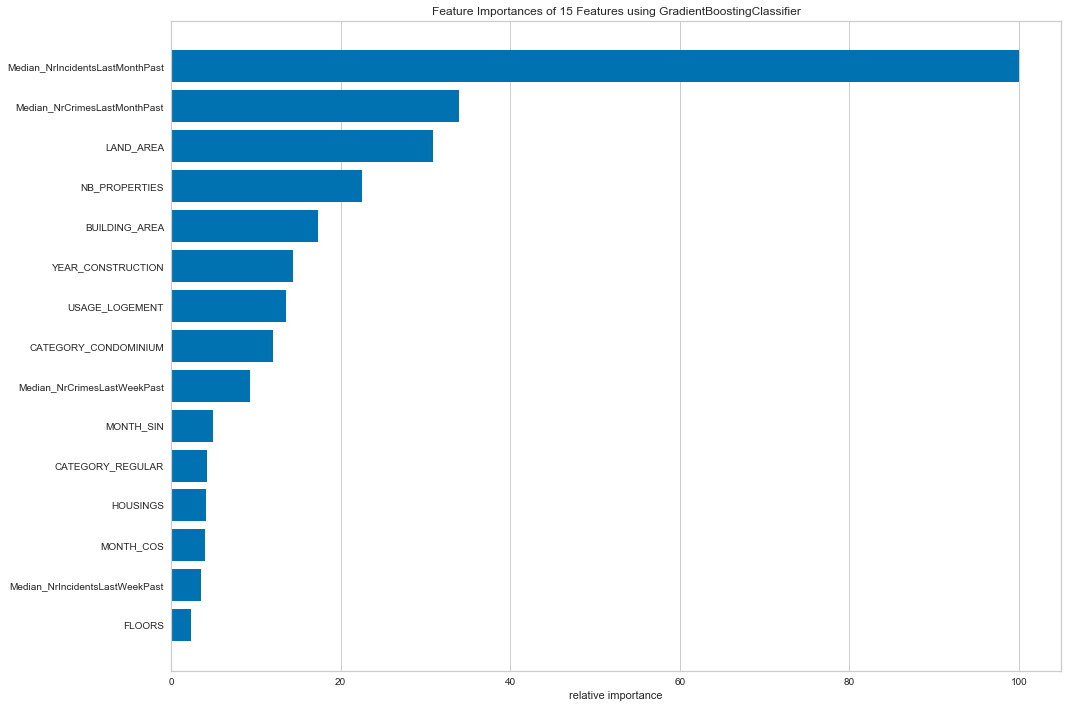

In [36]:
from yellowbrick.features import FeatureImportances

fi = FeatureImportances(clf, labels = features, size = (1080, 720), colors=["C0"])
fi.fit(X_train, y_train)
fi.finalize()

/Users/dbotnari/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/dbotnari/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


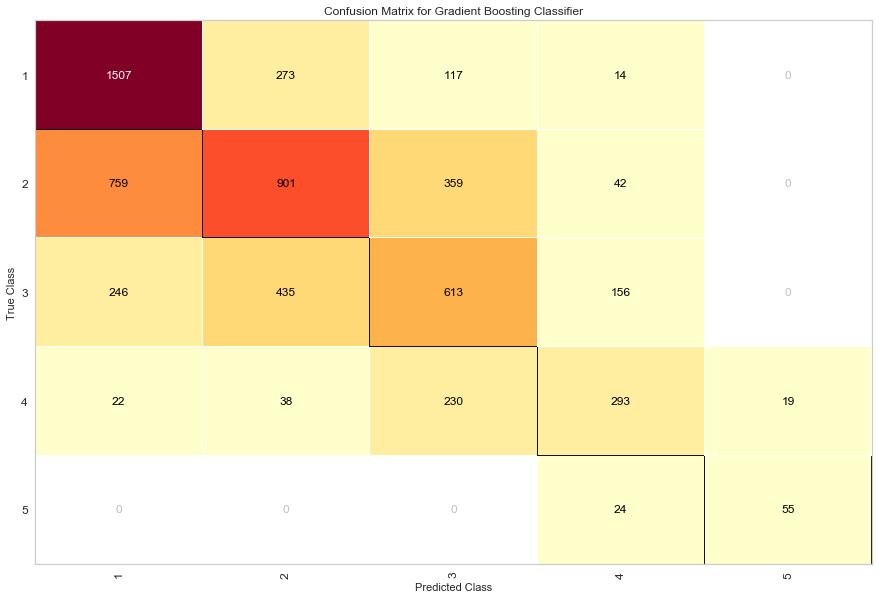

In [37]:
from yellowbrick.classifier import ConfusionMatrix
my_title = "Confusion Matrix for Gradient Boosting Classifier"

#classes = ["1", "2", "3", "4", "5"]

cle = ConfusionMatrix(clf, size = (1080, 720), title=my_title, show=False)
cle.score(X_test, y_test)
cle.finalize()

/Users/dbotnari/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/dbotnari/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


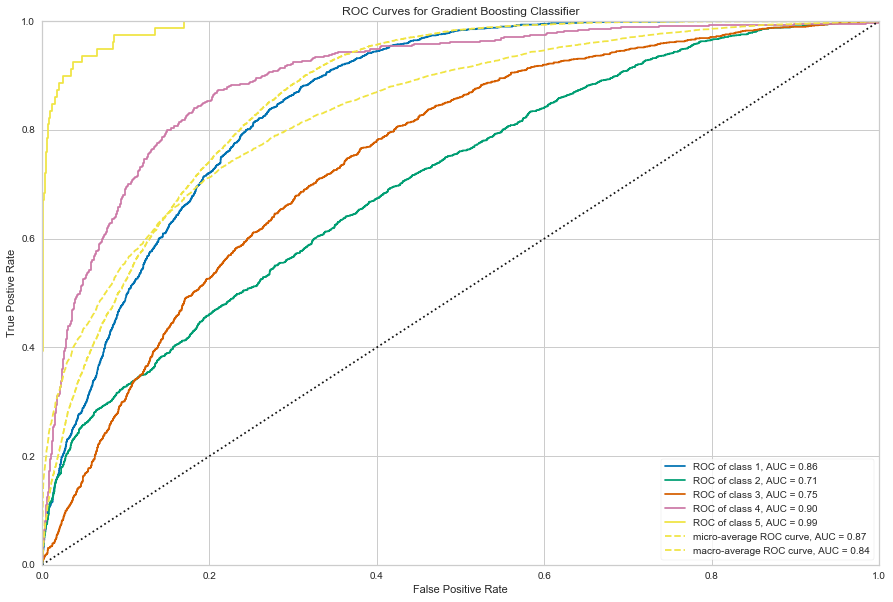

In [38]:
from yellowbrick.classifier import ROCAUC
my_title = "ROC Curves for Gradient Boosting Classifier"

#classes = ["1", "2", "3", "4", "5"]

cle = ROCAUC(clf, size = (1080, 720), title=my_title, show=False)
cle.score(X_test, y_test)

cle.finalize()

/Users/dbotnari/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


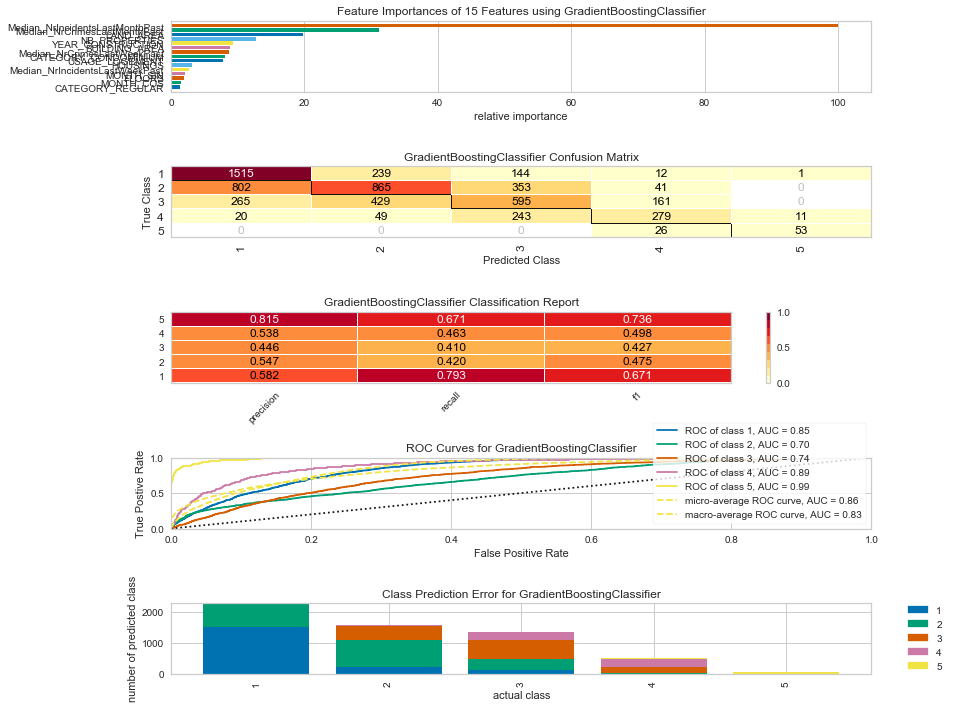

In [39]:
import matplotlib.pyplot as plt

from yellowbrick.features import FeatureImportances
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from sklearn.ensemble import GradientBoostingClassifier

fig, axes = plt.subplots(ncols=1, nrows=5, constrained_layout=False)

model = GradientBoostingClassifier()
visualgrid = [
    FeatureImportances(model, labels = features, ax=axes[0], size = (1080, 720)),
    ConfusionMatrix(model, ax=axes[1], size = (1080, 720)),
    ClassificationReport(model, ax=axes[2], size = (1080, 720)),
    ROCAUC(model, ax=axes[3], size = (1080, 720)),
    ClassPredictionError(model, ax=axes[4], size = (1080, 720))
]

for viz in visualgrid:
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.finalize()

plt.show()

# Predictions

In [55]:
df = pd.read_csv('../Data/Prod3/day2.csv')

In [56]:
X_prod_df = df.drop(['MAP_ID', 'MONTH'], axis=1)

In [57]:
X_prod = X_prod_df.values

In [58]:
y_prod = clf.predict(X_prod)

In [59]:
y_prod

array([1, 1, 1, ..., 1, 2, 1])

In [60]:
np.where(y_prod==5)

(array([ 565,  677, 1221, 1222, 1287, 1289, 1353, 1418, 1419, 1480, 1482,
        1536, 1537, 1595, 1700, 1704, 1742, 1743, 1746, 1748, 1849, 1869,
        2040, 2730]),)

In [53]:
np.where(y_prod==5)

(array([ 565,  676, 1219, 1220, 1285, 1287, 1351, 1416, 1417, 1479, 1481,
        1535, 1536, 1595, 1598, 1702, 1707, 1745, 1746, 1749, 1751, 1752,
        1854, 1874, 2045, 2738]),)

In [54]:
y_prod[np.where(y_prod>1)]

array([2, 2, 3, ..., 2, 2, 2])

In [ ]:
df[1737:1738].values

In [ ]:
print(df.iloc[np.where(y_prod==5)])